# Run this in an OQ Console as an administrator

**To install python packages, use `pip` in your OQ Console**

In [1]:
# Sample notebook for a deterministic seismic assessment for Venus SLC at Leinster, WA
# This project was looking at very short distances to consider potential effects for mining-induced seismicity
# As a result, the GMM developed for induced seismicity are weighted preferrentially. Additionally,
# GMMs were used for specific magnitude ranges (i.e. 3-4, 4-5, 5-6) and were weighted accordingly for each range.
#
# -------------------------
# Author: Erin Todd  
# Last Edited: 24 February 2021 (E.Todd)
# --------------------------


# !!! COPY THIS NOTEBOOK TO YOUR PROJECT FOLDER TO USE AS AN EXAMPLE. 
# !!! THIS NOTEBOOK IS NOT INTENDED TO BE A WORKING VERSION - IT IS AN EXAMPLE ONLY.

In [2]:
import os
userdir = os.environ['USERPROFILE']
onedrive_folder = os.environ['ONEDRIVE']
# Set filepath to your github repository
github_dir = os.path.join(userdir,'Documents','GitHub','initial_group_codes','python_tools')

import sys
# Add github repository to system path
if github_dir not in sys.path:
    sys.path.insert(0,github_dir)
print(sys.path)

['C:\\Users\\ertodd\\Documents\\GitHub\\initial_group_codes\\python_tools', 'C:\\Users\\ertodd\\Documents\\GitHub\\initial_group_codes\\sample_notebooks', 'C:\\Users\\ertodd\\Anaconda3\\python38.zip', 'C:\\Users\\ertodd\\Anaconda3\\DLLs', 'C:\\Users\\ertodd\\Anaconda3\\lib', 'C:\\Users\\ertodd\\Anaconda3', '', 'C:\\Users\\ertodd\\Anaconda3\\lib\\site-packages', 'C:\\Users\\ertodd\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\ertodd\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\ertodd\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\ertodd\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\ertodd\\.ipython']


In [3]:
from openquake.hazardlib.gsim import get_available_gsims
from openquake.hazardlib.gsim.base import RuptureContext, SitesContext, DistancesContext
from openquake.hazardlib import const
from openquake.hazardlib.imt import PGA, SA
import pandas as pd
import numpy as np    
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In C:\Users\ertodd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ertodd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ertodd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\ertodd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\ertodd\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_tes

In [4]:
from deterministic_tools import calculate_ground_motions

# Initialise project details

In [5]:
# Set project top directory
topdir = os.path.join(userdir, 'Golder Associates','20373366, BHP NiW NLN Mining Impacts on TSF2 Leinster WA - Deterministic_Seismic_Assessment')
figdir = os.path.join(topdir,'figures')

# Project name
proj_name = 'VenusSLC'

# site location - unknown
#sLat =
#sLon = 

# site soil condition
vs30 = '800' #m/s

# Identify magnitudes to be used in this DSA
mag_bin_width = 0.2
magnitudes = np.around(np.arange(3.0,6.0+mag_bin_width,mag_bin_width),decimals=1)

# Identify distances to be used in this DSA 
# !!! See note at top of notebook about why these distances are so short - normally these would be presented in kilometres)
distances = np.asarray([300, 500, 750, 1000]) # in m

# Look at tectonic region type for all existing OpenQuake GMMs

In [6]:
gmpe_list = get_available_gsims()
gmpe_list.pop('AlAtikSigmaModel')
gmpe_list.pop('AmeriEtAl2017RepiStressDrop')
gmpe_list.pop('AmeriEtAl2017RjbStressDrop')
gmpe_list.pop('AvgGMPE')
gmpe_list.pop('CY14SiteTerm')
gmpe_list.pop('Eurocode8Amplification')
gmpe_list.pop('Eurocode8AmplificationDefault')
gmpe_list.pop('GMPETable')
gmpe_list.pop('GenericGmpeAvgSA')
gmpe_list.pop('ModifiableGMPE')
gmpe_list.pop('NBCC2015_AA13')
gmpe_list.pop('NGAEastGMPE')
gmpe_list.pop('NGAEastGMPETotalSigma')
gmpe_list.pop('NGAEastUSGSGMPE')
gmpe_list.pop('NRCan15SiteTerm')
gmpe_list.pop('NRCan15SiteTermLinear')
gmpe_list.pop('NSHMP2014')
gmpe_list.pop('PitilakisEtAl2018')
gmpe_list.pop('PitilakisEtAl2020')
gmpe_list.pop('SandikkayaDinsever2018')
gmpe_list.pop('SplitSigmaGMPE')
gmpe_list.pop('TromansEtAl2019')
gmpe_list.pop('TromansEtAl2019SigmaMu')
gmpe_list.pop('WesternCan15Low')
gmpe_list.pop('WesternCan15Mid')
gmpe_list.pop('WesternCan15RjbLow')
gmpe_list.pop('WesternCan15RjbMid')
gmpe_list.pop('WesternCan15RjbUpp')
gmpe_list.pop('WesternCan15Upp')
for gmmName in gmpe_list:
    print(gmmName)
    print('\t',gmpe_list[gmmName]().DEFINED_FOR_TECTONIC_REGION_TYPE)
    

C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:437: DeprecationWarning: AkkarEtAl2013 is deprecated - use AkkarEtAlRjb2014 instead
  warnings.warn(msg, DeprecationWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:441: NotVerifiedWarning: Atkinson2015 is not independently verified - the user is liable for their application
  warnings.warn(msg, NotVerifiedWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:441: NotVerifiedWarning: AtkinsonMacias2009NSHMP2014 is not independently verified - the user is liable for their application
  warnings.warn(msg, NotVerifiedWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:445: ExperimentalWarning: BCHydroSERASInter is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\

AbrahamsonEtAl2014
	 Active Shallow Crust
AbrahamsonEtAl2014RegCHN
	 Active Shallow Crust
AbrahamsonEtAl2014RegJPN
	 Active Shallow Crust
AbrahamsonEtAl2014RegTWN
	 Active Shallow Crust
AbrahamsonEtAl2015SInter
	 Subduction Interface
AbrahamsonEtAl2015SInterHigh
	 Subduction Interface
AbrahamsonEtAl2015SInterLow
	 Subduction Interface
AbrahamsonEtAl2015SSlab
	 Subduction IntraSlab
AbrahamsonEtAl2015SSlabHigh
	 Subduction IntraSlab
AbrahamsonEtAl2015SSlabLow
	 Subduction IntraSlab
AbrahamsonEtAl2018SInter
	 Subduction Interface
AbrahamsonEtAl2018SInterHigh
	 Subduction Interface
AbrahamsonEtAl2018SInterLow
	 Subduction Interface
AbrahamsonEtAl2018SSlab
	 Subduction IntraSlab
AbrahamsonEtAl2018SSlabHigh
	 Subduction IntraSlab
AbrahamsonEtAl2018SSlabLow
	 Subduction IntraSlab
AbrahamsonSilva1997
	 Active Shallow Crust
AbrahamsonSilva2008
	 Active Shallow Crust
AfshariStewart2016
	 Active Shallow Crust
AfshariStewart2016Japan
	 Active Shallow Crust
AkkarBommer2010
	 Active Shallow Crust
Ak

C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:441: NotVerifiedWarning: McVerry2006Chch is not independently verified - the user is liable for their application
  warnings.warn(msg, NotVerifiedWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:441: NotVerifiedWarning: McVerry2006ChchAdditionalSigma is not independently verified - the user is liable for their application
  warnings.warn(msg, NotVerifiedWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:441: NotVerifiedWarning: McVerry2006ChchStressDrop is not independently verified - the user is liable for their application
  warnings.warn(msg, NotVerifiedWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardlib\gsim\base.py:437: DeprecationWarning: MontalvaEtAl2016SInter is deprecated - use MontalvaEtAl2017SInter instead
  warnings.warn(msg, DeprecationWarning)
C:\Users\ertodd\Anaconda3\lib\site-packages\openquake\hazardli

# Identify selected GMMs and their weights

In [7]:
# format: {gmm_name : [3.0-4.0 weight, 4.0-5.0 weight, 5.0-6.0 weight]}
gmms = {'ChiouYoungs2014' : [0.0,0.0,0.0], #trt = active shallow crust
        'Atkinson2015' : [0.3,0.4,0.0], #trt = INDUCED
        'DostEtAl2004' : [0.0,0.0,0.0], # trt = INDUCED
        'DouglasEtAl2013StochasticSD001Q200K005' : [0.0,0.0,0.0], #wrong Vs30 kind of conditions due to geothermal areas
        'McGarrFletcher2005' : [0.3,0.0,0.0],
        'ZalachorisRathje2019' : [0.2,0.2,0.0], 
        'Allen2012' : [0.0,0.0,0.0], 
        'AtkinsonBoore2006' : [0.0,0.0,0.0], 
        'AtkinsonBoore2006Modified2011' : [0.0,0.0,0.0], 
        'SomervilleEtAl2009YilgarnCraton' : [0.0,0.0,0.0], 
        'ZhaoEtAl2006AscSWISS05' : [0.0,0.0,0.0], 
        'BooreEtAl2014' : [0.0,0.0,0.0],
        #'BooreEtAl2014LowQ' : [0.0,0.0,0.0]
}

In [7]:
# format: {gmm_name : [3.0-4.0 weight, 4.0-5.0 weight, 5.0-6.0 weight]} 
# The length of the values list is len(np.arange(3.0,6.2,0.2))
gmms_weight_dict = {'McGarrFletcher2005' : ([0.3]*5) + ([0.0]*11),
                    'Atkinson2015' : ([0.3]*5) + ([0.4]*5) + ([0.0]*6),
                    'ZalachorisRathje2019' : ([0.2]*5) + ([0.2]*5) + ([0.0]*6),
                    'DostEtAl2004' : [0.0]*len(magnitudes), # trt = INDUCED
                    'DouglasEtAl2013StochasticSD001Q200K005' : [0.0]*len(magnitudes), 
                    'Allen2012' : ([0.0]*5) + ([0.1]*5) + ([(1/7)]*6), 
                    'AtkinsonBoore2006' : ([0.1]*5) + ([0.05]*5) + ([(1/7)]*6), 
                    'AtkinsonBoore2006Modified2011' : ([0.1]*5) + ([0.05]*5) + ([(1/7)]*6),
                    'SomervilleEtAl2009YilgarnCraton' : ([0.0]*10) + ([(1/7)]*6),  
                    'ZhaoEtAl2006AscSWISS05' : ([0.0]*5) + ([0.1]*5) + ([(1/7)]*6), 
                    'BooreEtAl2014' : ([0.0]*5) + ([0.05]*5) + ([(1/7)]*6),
                    'ChiouYoungs2014' : ([0.0]*5) + ([0.05]*5) + ([(1/7)]*6)
                   }

# Identify the input parameters required for each selected GMM

In [8]:
# Define the GMM list
gmm_list = []
for selected_gmm in gmms_weight_dict:
    gmm_list.append(gmpe_list[selected_gmm]())

for gmm in gmm_list:
    # Each GMM has the following information
    print(gmm)
    print('\tTectonic region type:',gmm.DEFINED_FOR_TECTONIC_REGION_TYPE)
    print('\tRupture params:',gmm.REQUIRES_RUPTURE_PARAMETERS)
    print('\tDistance params:',gmm.REQUIRES_DISTANCES)
    print('\tSite params:',gmm.REQUIRES_SITES_PARAMETERS)
    print('\tIMTs:',gmm.DEFINED_FOR_INTENSITY_MEASURE_TYPES)

[McGarrFletcher2005]
	Tectonic region type: Induced
	Rupture params: frozenset({'mag'})
	Distance params: frozenset({'rhypo'})
	Site params: frozenset()
	IMTs: frozenset({<class 'openquake.hazardlib.imt.PGA'>, <class 'openquake.hazardlib.imt.SA'>, <class 'openquake.hazardlib.imt.PGV'>})
[Atkinson2015]
	Tectonic region type: Induced
	Rupture params: frozenset({'mag'})
	Distance params: frozenset({'rhypo'})
	Site params: frozenset()
	IMTs: frozenset({<class 'openquake.hazardlib.imt.PGA'>, <class 'openquake.hazardlib.imt.SA'>, <class 'openquake.hazardlib.imt.PGV'>})
[ZalachorisRathje2019]
	Tectonic region type: Induced
	Rupture params: frozenset({'mag', 'rake'})
	Distance params: frozenset({'rhypo', 'rjb'})
	Site params: frozenset({'vs30'})
	IMTs: frozenset({<class 'openquake.hazardlib.imt.PGA'>, <class 'openquake.hazardlib.imt.SA'>, <class 'openquake.hazardlib.imt.PGV'>})
[DostEtAl2004]
	Tectonic region type: Induced
	Rupture params: frozenset({'mag'})
	Distance params: frozenset({'rhypo

# Calculate PGA values

**GMM input parameters could be read in as a dataframe from a file containing the required inputs**

Example:  

> Fault_name	Rrup	Rjb	Rx	Rhypo	Depth	Distance	Magnitude	Dip	Rake	Ztor	Vs30	Z1pt0	Vs30measured  
M3.0_R300	0.3	0.3	0	0.3	0.3	0.3	3.0	45	90	0.3	760	33.7	0
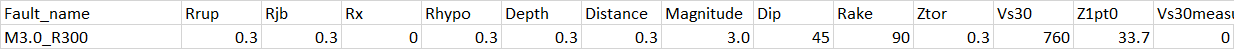
  
> Note: vs30measured is a switch where 0 = inferred and 1 = measured

In [9]:
# Initialise results directory
gmm_results = dict.fromkeys([str(x).replace('[','').replace(']','') for x in gmm_list])

for gmm in gmm_list:
    gmm_label = str(gmm).replace('[','').replace(']','')
    print(gmm_label)
    
    #Set GMM input parameters
    rctx = RuptureContext()
    rctx.dip = 45
    rctx.rake = 90
    sctx = SitesContext()
    sctx.vs30measured = 0 # 0 = inferred; 1 = measured
    dctx = DistancesContext()

    # Intensity measurements
    imts = [PGA()]

    # StdDev type
    stddev_types = [const.StdDev.TOTAL]
    
    if gmm_label == 'ZalachorisRathje2019':
        sctx.vs30 = np.asarray([760.0])
        sctx.z1pt0 = np.asarray([33.7]) # Calculated from Kalakamos et al 2011
    else: 
        sctx.vs30 = np.asarray([800.0])
        sctx.z1pt0 = np.asarray([26.8]) # Calculated from Kalakamos et al 2011
    
    # In this example, the site is directly about the source by the distances initialised above
    gmm_results[gmm_label] = dict.fromkeys(distances)
    for d in distances:
        dist_km = np.asarray([d/1000]) # distance in km
        dctx.rjb = dist_km
        dctx.rrup = dist_km
        dctx.rhypo = dist_km
        dctx.rx = dist_km
        rctx.hypo_depth = dist_km
        rctx.ztor = dist_km
        
        gmm_results[gmm_label][d] = dict.fromkeys(magnitudes)
        for m in magnitudes:
            rctx.mag = np.asarray([m])
            #Compute PGA ground motions for each magnitude/distances pair
            gmm_results[gmm_label][d][m] = calculate_ground_motions(gmm, sctx, rctx, dctx, imts, stddev_types)

McGarrFletcher2005
Atkinson2015
ZalachorisRathje2019
DostEtAl2004
DouglasEtAl2013StochasticSD001Q200K005
Allen2012
AtkinsonBoore2006
AtkinsonBoore2006Modified2011
SomervilleEtAl2009YilgarnCraton
ZhaoEtAl2006AscSWISS05
BooreEtAl2014
ChiouYoungs2014


## Look at the PGA results

In [10]:
for k1 in gmm_results.keys():
    print(k1)
    for k2 in gmm_results[k1].keys():
        print('\t',k2)
        for k3 in gmm_results[k1][k2].keys():
            print('\t\t',k3)
            for k4,v in gmm_results[k1][k2][k3].items():
                print('\t\t\t',k4,':',v)
#print(gmm_results)

McGarrFletcher2005
	 300
		 3.0
			 mean : [0.46891057]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [1.42590314]
			 mean_minus_1sd : [0.15420201]
		 3.2
			 mean : [0.70399573]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [2.14077007]
			 mean_minus_1sd : [0.23151014]
		 3.4
			 mean : [1.05693925]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [3.21403073]
			 mean_minus_1sd : [0.34757619]
		 3.6
			 mean : [1.58682862]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [4.82536338]
			 mean_minus_1sd : [0.52183118]
		 3.8
			 mean : [2.38237446]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [7.24452682]
			 mean_minus_1sd : [0.78344773]
		 4.0
			 mean : [3.57676185]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [10.87652154]
			 mean_minus_1sd : [1.17622397]
		 4.2
			 mean : [5.36994731]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [16.32939236]
			 mean_minus_1sd : [1.76591593]
		 4.4
			 mean : [8.06213422]
			 stddevs : [1.1121486]
			 mean_plus_1sd : [24.51602323]
			 mean_minus

			 mean_minus_1sd : [0.19063635]
		 3.8
			 mean : [0.69688596]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [1.63366014]
			 mean_minus_1sd : [0.29727728]
		 4.0
			 mean : [1.06388262]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.49398428]
			 mean_minus_1sd : [0.45383053]
		 4.2
			 mean : [1.15118101]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.6986317]
			 mean_minus_1sd : [0.49107024]
		 4.4
			 mean : [1.21039723]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.83744805]
			 mean_minus_1sd : [0.51633067]
		 4.6
			 mean : [1.23942419]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.90549391]
			 mean_minus_1sd : [0.52871298]
		 4.8
			 mean : [1.23799882]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.9021525]
			 mean_minus_1sd : [0.52810494]
		 5.0
			 mean : [1.20759703]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.83088376]
			 mean_minus_1sd : [0.51513616]
		 5.2
			 mean : [1.15124508]
			 stddevs : [0.85195648]
			 mean_plus_1sd : [2.69878189]
		

			 stddevs : [0.6195]
			 mean_plus_1sd : [0.3284163]
			 mean_minus_1sd : [0.09513358]
		 4.4
			 mean : [0.22815922]
			 stddevs : [0.6195]
			 mean_plus_1sd : [0.42391957]
			 mean_minus_1sd : [0.12279837]
		 4.6
			 mean : [0.29570001]
			 stddevs : [0.6195]
			 mean_plus_1sd : [0.54941026]
			 mean_minus_1sd : [0.15914973]
		 4.8
			 mean : [0.38478594]
			 stddevs : [0.6195]
			 mean_plus_1sd : [0.71493181]
			 mean_minus_1sd : [0.20709698]
		 5.0
			 mean : [0.50273786]
			 stddevs : [0.6195]
			 mean_plus_1sd : [0.93408635]
			 mean_minus_1sd : [0.27058029]
		 5.2
			 mean : [0.65950569]
			 stddevs : [0.6195]
			 mean_plus_1sd : [1.22536079]
			 mean_minus_1sd : [0.35495485]
		 5.4
			 mean : [0.86866046]
			 stddevs : [0.6195]
			 mean_plus_1sd : [1.6139701]
			 mean_minus_1sd : [0.46752476]
		 5.6
			 mean : [0.97882125]
			 stddevs : [0.6195]
			 mean_plus_1sd : [1.81864871]
			 mean_minus_1sd : [0.52681479]
		 5.8
			 mean : [0.9407249]
			 stddevs : [0.6195]
			 mean_plu

			 mean_minus_1sd : [0.35244335]
		 4.2
			 mean : [0.97969146]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [2.09454321]
			 mean_minus_1sd : [0.45823613]
		 4.4
			 mean : [1.27376504]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [2.72326136]
			 mean_minus_1sd : [0.59578467]
		 4.6
			 mean : [1.65611055]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [3.54070158]
			 mean_minus_1sd : [0.7746211]
		 4.8
			 mean : [2.15322456]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [4.60351248]
			 mean_minus_1sd : [1.00713879]
		 5.0
			 mean : [2.79955707]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [5.98534687]
			 mean_minus_1sd : [1.30945122]
		 5.2
			 mean : [3.63989893]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [7.78196592]
			 mean_minus_1sd : [1.70250864]
		 5.4
			 mean : [4.73248585]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [10.11787534]
			 mean_minus_1sd : [2.21354994]
		 5.6
			 mean : [6.15303414]
			 stddevs : [0.75985308]
			 mean_plus_1sd : [13.15495372]

			 mean : [0.65827016]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [1.69982482]
			 mean_minus_1sd : [0.25492015]
		 3.4
			 mean : [0.81853009]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.11365767]
			 mean_minus_1sd : [0.31698204]
		 3.6
			 mean : [0.9145973]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.3617282]
			 mean_minus_1sd : [0.3541848]
		 3.8
			 mean : [0.95878466]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.47583146]
			 mean_minus_1sd : [0.37129669]
		 4.0
			 mean : [0.97800809]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.52547137]
			 mean_minus_1sd : [0.37874111]
		 4.2
			 mean : [0.99179027]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.56106053]
			 mean_minus_1sd : [0.38407836]
		 4.4
			 mean : [1.0098027]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.60757332]
			 mean_minus_1sd : [0.39105382]
		 4.6
			 mean : [1.03569073]
			 stddevs : [0.94866506]
			 mean_plus_1sd : [2.67442295]
			 mean_minus_1sd : [0.40107915]
		 4.8
			 

			 mean_plus_1sd : [7.22739975]
			 mean_minus_1sd : [1.81544074]
		 5.6
			 mean : [3.76249309]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [7.50716068]
			 mean_minus_1sd : [1.8857135]
		 5.8
			 mean : [3.84398325]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [7.66975491]
			 mean_minus_1sd : [1.92655533]
		 6.0
			 mean : [3.88266983]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [7.7469448]
			 mean_minus_1sd : [1.94594455]
	 1000
		 3.0
			 mean : [0.45916579]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [0.9161562]
			 mean_minus_1sd : [0.23012803]
		 3.2
			 mean : [0.58660501]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [1.17043087]
			 mean_minus_1sd : [0.29399894]
		 3.4
			 mean : [0.74090959]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [1.47830898]
			 mean_minus_1sd : [0.37133443]
		 3.6
			 mean : [0.92518346]
			 stddevs : [0.69077553]
			 mean_plus_1sd : [1.84598369]
			 mean_minus_1sd : [0.46369014]
		 3.8
			 mean : [1.14217777]
			 stddevs : [0.690775

			 stddevs : [0.60183802]
			 mean_plus_1sd : [0.82764976]
			 mean_minus_1sd : [0.24836862]
		 5.2
			 mean : [0.51692996]
			 stddevs : [0.59193011]
			 mean_plus_1sd : [0.93433729]
			 mean_minus_1sd : [0.28599585]
		 5.4
			 mean : [0.56680846]
			 stddevs : [0.58208075]
			 mean_plus_1sd : [1.01445032]
			 mean_minus_1sd : [0.31669548]
		 5.6
			 mean : [0.59698037]
			 stddevs : [0.57229298]
			 mean_plus_1sd : [1.058044]
			 mean_minus_1sd : [0.33683434]
		 5.8
			 mean : [0.62081621]
			 stddevs : [0.56257]
			 mean_plus_1sd : [1.08964265]
			 mean_minus_1sd : [0.35370566]
		 6.0
			 mean : [0.64182317]
			 stddevs : [0.55291523]
			 mean_plus_1sd : [1.1156897]
			 mean_minus_1sd : [0.36922182]
	 750
		 3.0
			 mean : [0.01246254]
			 stddevs : [0.60183802]
			 mean_plus_1sd : [0.02275]
			 mean_minus_1sd : [0.00682703]
		 3.2
			 mean : [0.02032504]
			 stddevs : [0.60183802]
			 mean_plus_1sd : [0.03710276]
			 mean_minus_1sd : [0.01113413]
		 3.4
			 mean : [0.03221476]
			

			 mean_minus_1sd : [0.22144063]
		 6.0
			 mean : [0.47703801]
			 stddevs : [0.63315154]
			 mean_plus_1sd : [0.89851887]
			 mean_minus_1sd : [0.25326709]
	 500
		 3.0
			 mean : [0.00781462]
			 stddevs : [0.77072545]
			 mean_plus_1sd : [0.01689]
			 mean_minus_1sd : [0.00361565]
		 3.2
			 mean : [0.01154201]
			 stddevs : [0.77064578]
			 mean_plus_1sd : [0.02494415]
			 mean_minus_1sd : [0.00534065]
		 3.4
			 mean : [0.01676624]
			 stddevs : [0.77054129]
			 mean_plus_1sd : [0.03623077]
			 mean_minus_1sd : [0.00775879]
		 3.6
			 mean : [0.02390975]
			 stddevs : [0.77041045]
			 mean_plus_1sd : [0.05166067]
			 mean_minus_1sd : [0.01106598]
		 3.8
			 mean : [0.03349373]
			 stddevs : [0.77025372]
			 mean_plus_1sd : [0.07235698]
			 mean_minus_1sd : [0.0155041]
		 4.0
			 mean : [0.04612932]
			 stddevs : [0.77007429]
			 mean_plus_1sd : [0.09963595]
			 mean_minus_1sd : [0.02135689]
		 4.2
			 mean : [0.06252889]
			 stddevs : [0.76987796]
			 mean_plus_1sd : [0.1350313]

## Create table with PGA results for report

In [11]:
df = pd.DataFrame(columns=['gmm', 'distance', 'magnitude', 'Median PGA'])
gmms = []
dists = []
mags = []
means = []
means_plus_one = []
for gmm in gmm_results.keys():
    for dist in gmm_results[gmm].keys():
        for mag in gmm_results[gmm][dist].keys():
            gmms.append(gmm)
            dists.append(dist)  
            mags.append(mag)
            means.append(gmm_results[gmm][dist][mag].get('mean')[0])
            means_plus_one.append(gmm_results[gmm][dist][mag].get('mean_plus_1sd')[0])
            
            
            
df['gmm'] = gmms
df['distance'] = dists
df['magnitude'] = mags
df['Median PGA'] = means
df['84th percentile PGA'] = means_plus_one
display(df)
df.to_excel(os.path.join(topdir,'full_output_by_gmm_table.xlsx'), index=False)

,gmm,distance,magnitude,Median PGA,84th percentile PGA
0,McGarrFletcher2005,300,3.0,0.468911,1.425903
1,McGarrFletcher2005,300,3.2,0.703996,2.140770
2,McGarrFletcher2005,300,3.4,1.056939,3.214031
3,McGarrFletcher2005,300,3.6,1.586829,4.825363
4,McGarrFletcher2005,300,3.8,2.382374,7.244527
...,...,...,...,...,...
763,ChiouYoungs2014,1000,5.2,0.261981,0.550008
764,ChiouYoungs2014,1000,5.4,0.308166,0.629592
765,ChiouYoungs2014,1000,5.6,0.349401,0.694718
766,ChiouYoungs2014,1000,5.8,0.385155,0.745351


# Plot PGA results

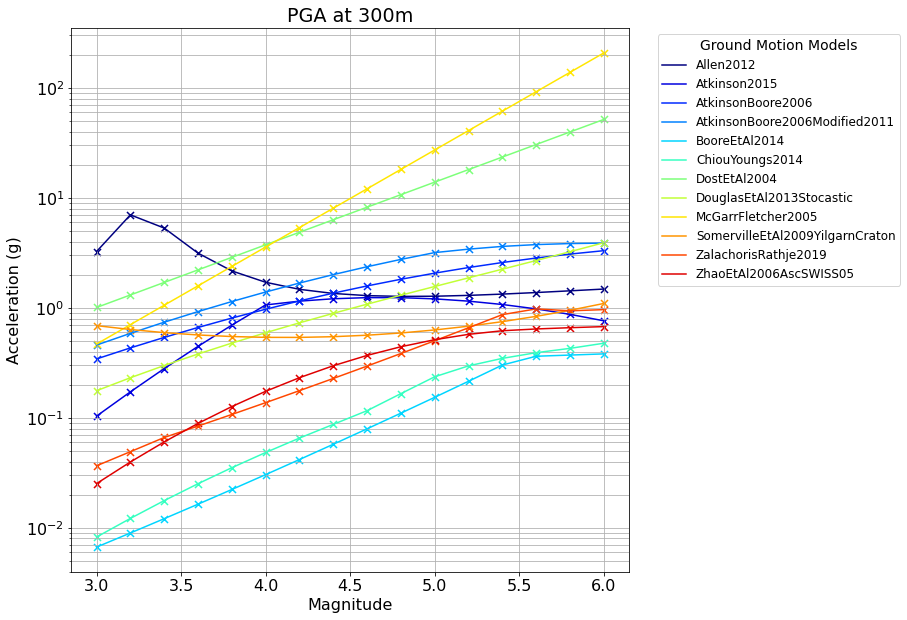

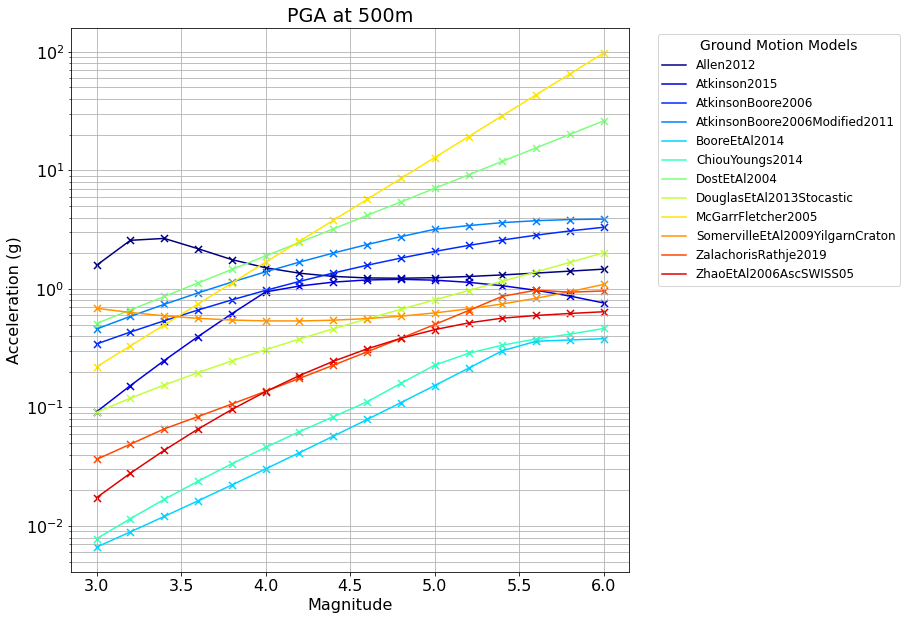

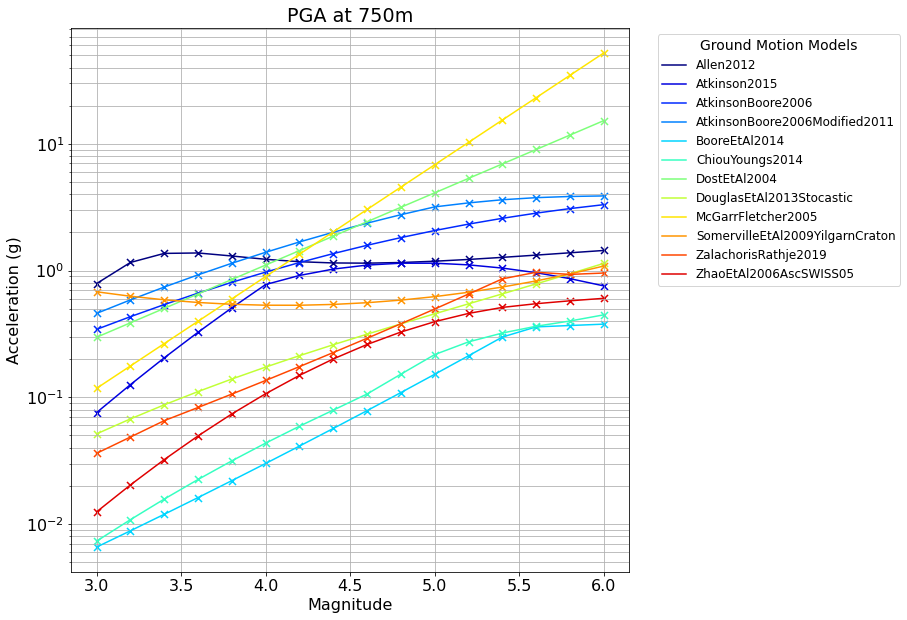

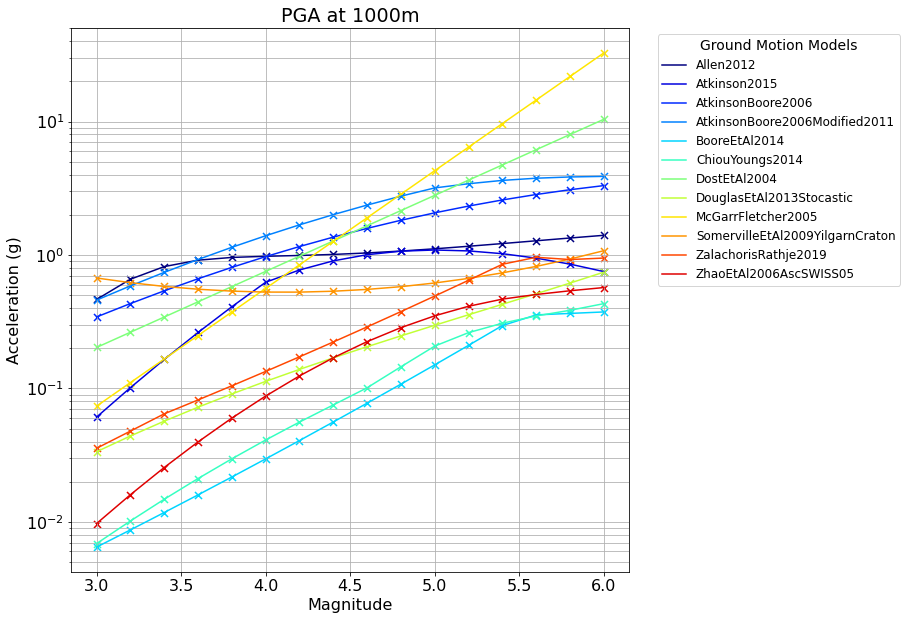

In [12]:
grouped_distance = df.groupby(['distance'])

from cycler import cycler
color_cycler = cycler('color', [plt.get_cmap('jet')(i/12) for i in range(12)])
plt.rc('axes', prop_cycle=color_cycler)
#fig,ax = plt.subplots(figsize=[15,15])

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

for distance, group_dist in grouped_distance:
    fig,ax = plt.subplots(figsize=[10,10])
    for gmm, group_gmm in group_dist.groupby(['gmm']):
        #print(group_gmm)
        if gmm.startswith('Douglas'):
            gmm_label = 'DouglasEtAl2013Stocastic'
        else:
            gmm_label = gmm
        mags = group_gmm['magnitude'].tolist()
        medians = group_gmm['Median PGA'].tolist()
        medians_plus_std = group_gmm['84th percentile PGA']
        ax.semilogy(mags,medians,label = gmm_label)
        ax.scatter(mags,medians,s=50,marker = 'x')
    ax.legend(bbox_to_anchor=(1.04,1) ,fontsize=12, title='Ground Motion Models', title_fontsize=14)
    ax.grid(which='both')
    ax.set_title('PGA at '+str(distance)+'m')
    ax.set_xlabel('Magnitude')
    ax.set_ylabel('Acceleration (g)')
    plt.savefig(os.path.join(figdir,'PGA_values_by_mag_at_'+str(distance)+'.png'),format='PNG', dpi=600, bbox_inches='tight', pad_inches=0.1)


# Plot weighted PGA results

In [13]:
display(df)

,gmm,distance,magnitude,Median PGA,84th percentile PGA
0,McGarrFletcher2005,300,3.0,0.468911,1.425903
1,McGarrFletcher2005,300,3.2,0.703996,2.140770
2,McGarrFletcher2005,300,3.4,1.056939,3.214031
3,McGarrFletcher2005,300,3.6,1.586829,4.825363
4,McGarrFletcher2005,300,3.8,2.382374,7.244527
...,...,...,...,...,...
763,ChiouYoungs2014,1000,5.2,0.261981,0.550008
764,ChiouYoungs2014,1000,5.4,0.308166,0.629592
765,ChiouYoungs2014,1000,5.6,0.349401,0.694718
766,ChiouYoungs2014,1000,5.8,0.385155,0.745351


In [15]:
gmms_weight_dict = {'McGarrFletcher2005' : ([0.3]*5) + ([0.0]*11),
                    'Atkinson2015' : ([0.3]*5) + ([0.4]*5) + ([0.0]*6),
                    'ZalachorisRathje2019' : ([0.2]*5) + ([0.2]*5) + ([0.0]*6),
                    'DostEtAl2004' : [0.0]*len(magnitudes), # trt = INDUCED
                    'DouglasEtAl2013StochasticSD001Q200K005' : [0.0]*len(magnitudes), 
                    'Allen2012' : ([0.0]*5) + ([0.1]*5) + ([(1/7)]*6), 
                    'AtkinsonBoore2006' : ([0.1]*5) + ([0.05]*5) + ([(1/7)]*6), 
                    'AtkinsonBoore2006Modified2011' : ([0.1]*5) + ([0.05]*5) + ([(1/7)]*6),
                    'SomervilleEtAl2009YilgarnCraton' : ([0.0]*10) + ([(1/7)]*6),  
                    'ZhaoEtAl2006AscSWISS05' : ([0.0]*5) + ([0.1]*5) + ([(1/7)]*6), 
                    'BooreEtAl2014' : ([0.0]*5) + ([0.05]*5) + ([(1/7)]*6),
                    'ChiouYoungs2014' : ([0.0]*5) + ([0.05]*5) + ([(1/7)]*6)
                   }

,magnitude,distance,median,84th
0,3.0,300.0,0.259386,0.674489
1,3.2,300.0,0.374702,0.985163
2,3.4,300.0,0.542485,1.441501
3,3.6,300.0,0.785832,2.110182
4,3.8,300.0,1.140256,3.092439
...,...,...,...,...
59,5.2,1000.0,1.208957,2.476084
60,5.4,1000.0,1.318736,2.689086
61,5.6,1000.0,1.416118,2.877435
62,5.8,1000.0,1.498813,3.037985


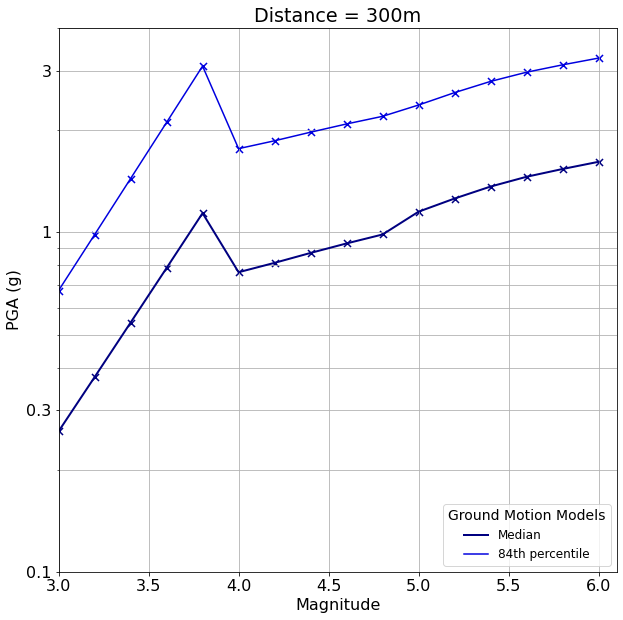

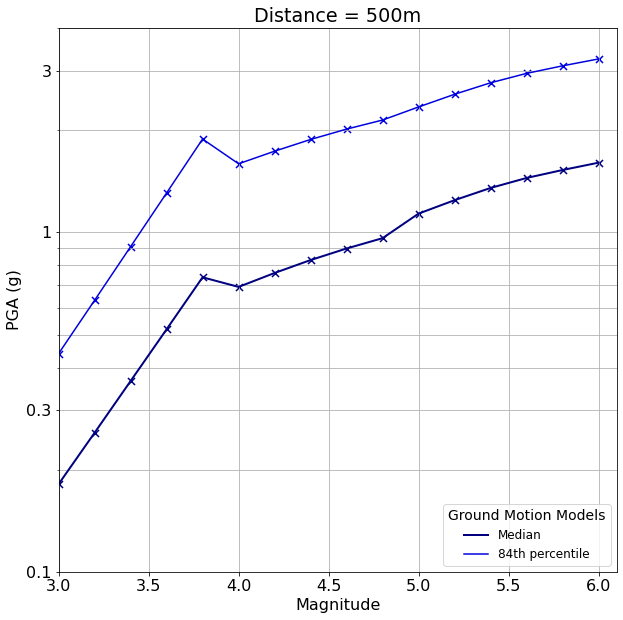

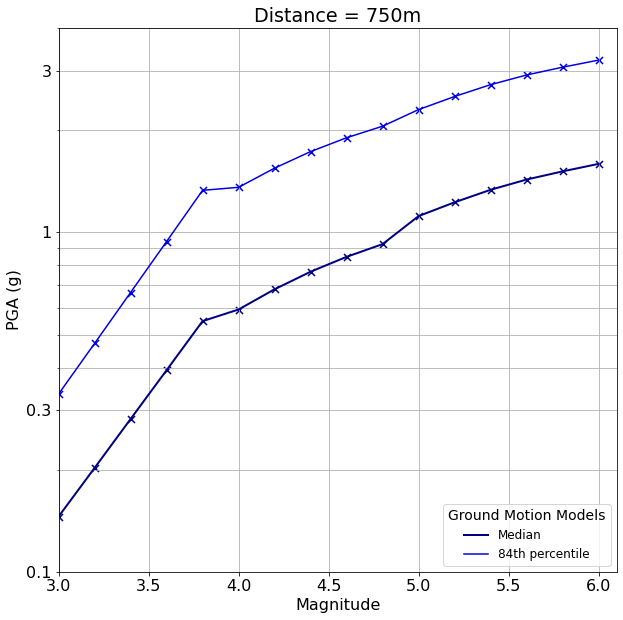

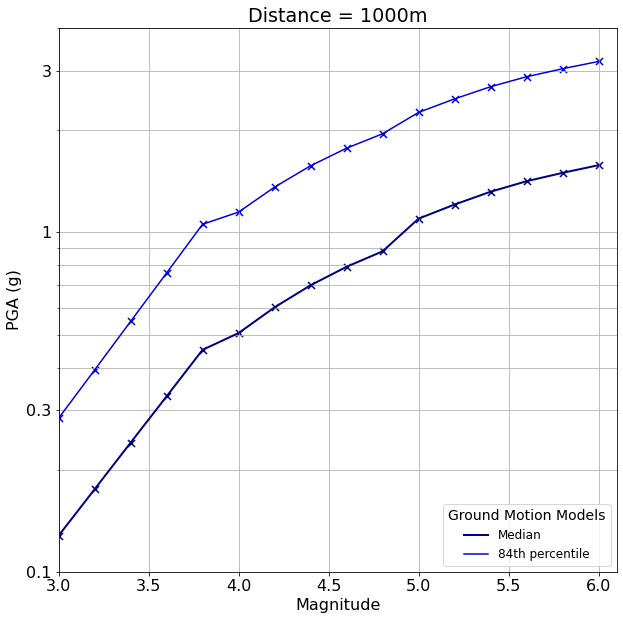

In [14]:
grouped_distance = df.groupby(['distance'])
df2 = pd.DataFrame(columns=['magnitude','distance','median','84th'])

for distance, group_dist in grouped_distance:
    fig,ax = plt.subplots(figsize=[10,10])
    weighted_median = []
    weighted_84th = []
    for gmm, group_gmm in group_dist.groupby(['gmm']):
        
        group_gmm['weights'] = gmms_weight_dict[gmm]
        
        # Calculate weighted median and 84th percentile PGAs
        weighted_gmm_medians = group_gmm['Median PGA'].to_numpy() * group_gmm['weights'].to_numpy()
        weighted_gmm_84th = group_gmm['84th percentile PGA'].to_numpy() * group_gmm['weights'].to_numpy()
        
        # Add the weighted median and 84th fractile values to the distance-grouped dataframe
        group_gmm['weighted_median'] = weighted_gmm_medians
        group_gmm['weighted_84th'] = weighted_gmm_84th
        #display(group_gmm)
        
        # Append to master list for summing
        weighted_median.append(weighted_gmm_medians)
        weighted_84th.append(weighted_gmm_84th)
        #ax.semilogy(magnitudes,weighted_gmm_medians,label = gmm)
    
    # Compute weighted sum of median and 84th percentiles for each magnitude/distance pair
    weighted_median = np.sum(np.asarray(weighted_median),axis=0)
    weighted_84th = np.sum(np.asarray(weighted_84th),axis=0)
    
    # Plot the weighted sums of the median and 84th percentiles
    ax.semilogy(magnitudes,weighted_median,label = 'Median', lw=2)
    ax.scatter(magnitudes,weighted_median,s=50,marker = 'x') #Add discrete points to the figure
    
    ax.semilogy(magnitudes, weighted_84th, label = '84th percentile')
    ax.scatter(magnitudes,weighted_84th,s=50,marker = 'x') # Add discrete points to the figure

    # Annotate the figure
    ax.legend(fontsize=12, title='Ground Motion Models', title_fontsize=14, loc='lower right')
    ax.grid(which='both')
    ax.axis([3,6.1,0.1,4])
    ax.set_title('Distance = '+str(distance)+'m')
    ax.set_xlabel('Magnitude')
    ax.set_ylabel('PGA (g)')
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    ax.set_yticks([0.1, 0.3,1,3])
    ax.set_yticklabels([0.1, 0.3,1,3])
    plt.savefig(os.path.join(figdir,'Weighted_PGA_by_mag_at_'+str(distance)+'.png'),format='PNG', dpi=600, bbox_inches='tight', pad_inches=0.1)

    # Create a table with the final values for the report
    for i,mag in enumerate(magnitudes):
        newrow = {'magnitude':mag, 'distance':distance,'median':weighted_median[i],'84th':weighted_84th[i]}
        df2 = df2.append(newrow, ignore_index=True)

display(df2)
df2.to_excel(os.path.join(topdir,'final_PGA_results.xlsx'),index=False)

# Calculate Spectra

In [15]:
# Initialise results directory
gmm_spectra_results = dict.fromkeys([str(x).replace('[','').replace(']','') for x in gmm_list])

for gmm in gmm_list:
    gmm_label = str(gmm).replace('[','').replace(']','')
    print(gmm_label)
    
    rctx = RuptureContext()
    rctx.dip = 45
    rctx.rake = 90
    sctx = SitesContext()
    sctx.vs30measured = 0 # 0 = inferred; 1 = measured
    dctx = DistancesContext()

    # Intensity measurements
    periods = np.logspace(-2., 1., 70)
    imts = [PGA()] + [SA(per) for per in periods[1:]]

    # StdDev type
    stddev_types = [const.StdDev.TOTAL]
    
    if gmm_label == 'ZalachorisRathje2019':
        sctx.vs30 = np.asarray([760.0])
        sctx.z1pt0 = np.asarray([33.7]) # Calculated from Kalakamos et al 2011
    else: 
        sctx.vs30 = np.asarray([800.0])
        sctx.z1pt0 = np.asarray([26.8]) # Calculated from Kalakamos et al 2011
        
    gmm_spectra_results[gmm_label] = dict.fromkeys(distances)
    for d in distances:
        dist_km = np.asarray([d/1000])
        dctx.rjb = dist_km
        dctx.rrup = dist_km
        dctx.rhypo = dist_km
        dctx.rx = dist_km
        rctx.hypo_depth = dist_km
        rctx.ztor = dist_km
        
        gmm_spectra_results[gmm_label][d] = dict.fromkeys(magnitudes)
        for m in magnitudes:
            rctx.mag = np.asarray([m])
            gmm_spectra_results[gmm_label][d][m] = calculate_ground_motions(gmm, sctx, rctx, dctx, imts, stddev_types)

McGarrFletcher2005
Atkinson2015
ZalachorisRathje2019
DostEtAl2004
DouglasEtAl2013StochasticSD001Q200K005
Allen2012
AtkinsonBoore2006
AtkinsonBoore2006Modified2011
SomervilleEtAl2009YilgarnCraton
ZhaoEtAl2006AscSWISS05
BooreEtAl2014
ChiouYoungs2014


## Create table with spectra values

In [16]:
df_spectra = pd.DataFrame(columns=['gmm', 'distance', 'magnitude', 'Median spectra'])
gmms_spectra = []
dists_spectra = []
mags_spectra = []
means_spectra = []
means_plus_one_spectra = []
for gmm in gmm_spectra_results.keys():
    for dist in gmm_spectra_results[gmm].keys():
        for mag in gmm_spectra_results[gmm][dist].keys():
            gmms_spectra.append(gmm)
            dists_spectra.append(dist)  
            mags_spectra.append(mag)
            means_spectra.append(gmm_spectra_results[gmm][dist][mag].get('mean'))
            means_plus_one_spectra.append(gmm_spectra_results[gmm][dist][mag].get('mean_plus_1sd'))
        
df_spectra['gmm'] = gmms_spectra
df_spectra['distance'] = dists_spectra
df_spectra['magnitude'] = mags_spectra
df_spectra['Median spectra'] = means_spectra
df_spectra['84th percentile spectra'] = means_plus_one_spectra
display(df_spectra)
df_spectra.to_excel(os.path.join(topdir,'full_spectrum_output_table.xlsx'), index=False)

,gmm,distance,magnitude,Median spectra,84th percentile spectra
0,McGarrFletcher2005,300,3.0,"[0.46891057186877455, nan, nan, nan, nan, nan,...","[1.4259031363770573, nan, nan, nan, nan, nan, ..."
1,McGarrFletcher2005,300,3.2,"[0.7039957288451163, nan, nan, nan, nan, nan, ...","[2.140770069985172, nan, nan, nan, nan, nan, n..."
2,McGarrFletcher2005,300,3.4,"[1.0569392459141724, nan, nan, nan, nan, nan, ...","[3.214030725949985, nan, nan, nan, nan, nan, n..."
3,McGarrFletcher2005,300,3.6,"[1.5868286181028732, nan, nan, nan, nan, nan, ...","[4.8253633831036105, nan, nan, nan, nan, nan, ..."
4,McGarrFletcher2005,300,3.8,"[2.382374458100825, nan, nan, nan, nan, nan, n...","[7.2445268151924385, nan, nan, nan, nan, nan, ..."
...,...,...,...,...,...
763,ChiouYoungs2014,1000,5.2,"[0.26198112233135784, 0.2625511578271825, 0.26...","[0.5500082234708988, 0.5512781011702617, 0.552..."
764,ChiouYoungs2014,1000,5.4,"[0.3081658138266348, 0.30885473522305945, 0.30...","[0.6295922101445469, 0.6310993227639184, 0.632..."
765,ChiouYoungs2014,1000,5.6,"[0.3494011265111777, 0.3501790709678103, 0.350...","[0.6947184252970724, 0.6963920254108564, 0.698..."
766,ChiouYoungs2014,1000,5.8,"[0.38515459769281085, 0.38599521387297264, 0.3...","[0.745351351927898, 0.7471316317319437, 0.7489..."


# Plot Spectra Results

In [ ]:
grouped_dist_mag = df_spectra.groupby(['distance','magnitude'])

from cycler import cycler
color_cycler = cycler('color', [plt.get_cmap('jet')(i/12) for i in range(12)])
plt.rc('axes', prop_cycle=color_cycler)

#fig,ax = plt.subplots(figsize=[15,15])
plotting_periods = periods
for dist_mag, group_dist_mag in grouped_dist_mag:
    fig,ax = plt.subplots(figsize=[10,10])
    for gmm, group_spectra_gmm in group_dist_mag.groupby(['gmm']):
        #print(group_spectra_gmm['Median spectra'].to_numpy()[0])
        medians = group_spectra_gmm['Median spectra'].to_numpy()[0]
        medians_plus_std = group_spectra_gmm['84th percentile spectra'].to_numpy()[0]
        
        if gmm.startswith('Douglas'):
            gmm_label = 'DouglasEtAl2013Stocastic'
        else:
            gmm_label = gmm
        
        if np.count_nonzero(~np.isnan(medians)) == 1:
            ax.scatter(plotting_periods,medians,s=75,marker = 's', label=gmm_label + ' (PGA Only)')
        else:
            ax.loglog(plotting_periods,medians,label = gmm_label)
            #ax.scatter(plotting_periods,medians,s=15,marker = 'o')
            ax.scatter(plotting_periods[0],medians[0],s=50, marker='x')
            
    ax.legend(bbox_to_anchor=(1.04,1) ,fontsize=12, title='Ground Motion Models', title_fontsize=14)
    ax.grid(which='both')
    ax.axis([0.01,10,0.01,10])
    ax.set_title('Hazard spectra at '+str(dist_mag[0])+' m for M'+ str(dist_mag[1]))
    ax.set_xlabel('Spectral Period (s)')
    ax.set_ylabel('Acceleration (g)')
    ax.set_xticks([0.01,0.1,1,10])
    ax.set_xticklabels(['PGA',0.1,1,10])
    plt.savefig(os.path.join(figdir,'hazard_spectra_'+str(dist_mag[0])+'_'+str(dist_mag[1])+'.png'),format='PNG', dpi=600, bbox_inches='tight', pad_inches=0.1)
